In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


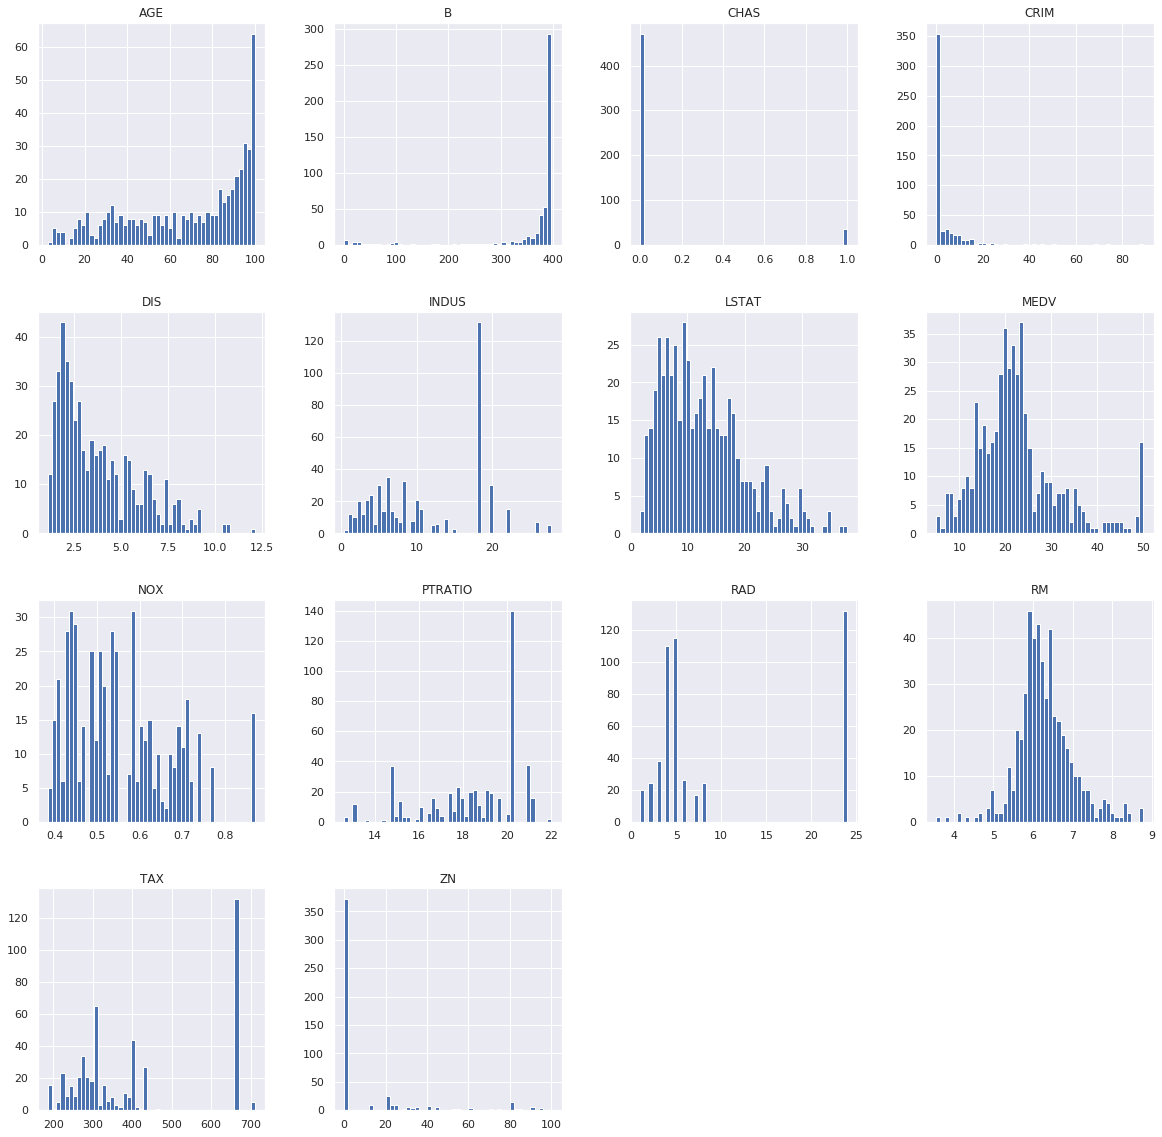

In [5]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

# Data Preprocessing

## Pipeline
Imputer and Feature Scaling

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values = np.nan,  strategy = 'mean')),
    ('scale', StandardScaler())
    ])
df_transform = pipe.fit_transform(df)

## Train Test Split

In [7]:
X = df_transform[:, :-1]
y = df_transform[:, 13:]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Look for Correlation

In [9]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values() 

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.696169
MEDV       1.000000
Name: MEDV, dtype: float64

So we see that MEDV has a strong correlation with LSTAT, PTRATIO, ZN, RM

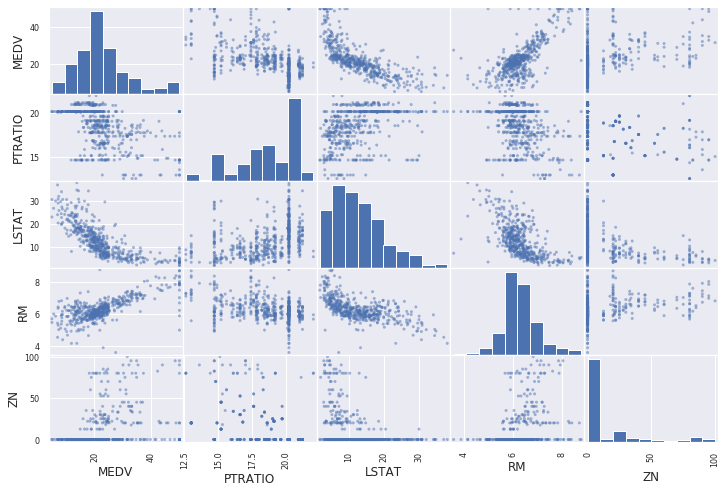

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'PTRATIO', 'LSTAT', 'RM', 'ZN']
scatter_matrix(df[attributes], figsize = (12,8))
plt.show()

### Observation
So here we see that MEDV having strong correlation with RM and with LSTAT
But MEDV with PTRATO or with ZN is not strong enough.

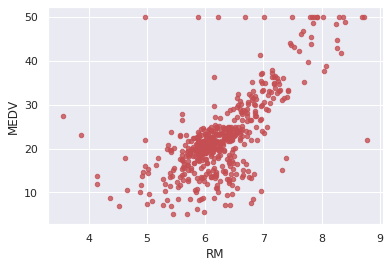

In [11]:
df.plot(kind = 'scatter', x = 'RM', y = 'MEDV', alpha = 0.8, c = 'r')
plt.show()

# Regression

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = lin_reg.predict(X_test)

#### Linear Regression Results
Mean :  0.4977721137420895\
Standard Deviation :  0.06257777744457635

In [14]:
# Backpropagation
import statsmodels.api as sm
arr_ones = np.ones((506,1)).astype(int)
X_lr = np.append(arr = arr_ones, values = X, axis = 1)

In [15]:
# Sumary Table
X_opt = X_lr[:,:]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sat, 16 May 2020   Prob (F-statistic):          1.24e-134
Time:                        19:18:21   Log-Likelihood:                -377.19
No. Observations:                 506   AIC:                             782.4
Df Residuals:                     492   BIC:                             841.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.638e-16      0.023  -2.45e-14      1.000      -0.045       0.045
x1            -0.1011      0.031     -3.284      0.001      -0.162      -0.041
x2             0.1179      0.035      3.381      0.001       0.049       0.186
x3             0.0164      0.046      0.357      0.722      -0.074       0.107
x4             0.0742      0.024      3.115      0.002       0.027       0.121
x5            -0.2232      0.048     -4.632      0.000      -0.318      -0.129
x6             0.2894      0.032      9.036      0.000       0.227       0.352
x7             0.0030      0.040      0.073      0.942      -0.077       0.082
x8            -0.3354      0.046     -7.330      0.000      -0.425      -0.246
x9             0.2915      0.063      4.636      0.000       0.168       0.415
x10           -0.2277      0.069     -3.301      0.001      -0.363      -0.092
x11           -0.2245      0.031     -7.280      0.000      -0.285      -0.164
x12            0.0924      0.027      3.462      0.001       0.040       0.145
x13           -0.4083      0.039    -10.347      0.000      -0.486      -0.331
==============================================================================
Omnibus:                      176.985   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              771.123
Skew:                           1.514   Prob(JB):                    3.57e-168
Kurtosis:                       8.235   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
cols = [0,1,2,4,5,6,8,9,10,11,12,13] # remove cols 7 and 3
X_opt = X_lr[:,cols]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     127.8
Date:                Sat, 16 May 2020   Prob (F-statistic):          1.04e-136
Time:                        19:18:21   Log-Likelihood:                -377.25
No. Observations:                 506   AIC:                             778.5
Df Residuals:                     494   BIC:                             829.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.638e-16      0.023  -2.46e-14      1.000      -0.045       0.045
x1            -0.1015      0.031     -3.305      0.001      -0.162      -0.041
x2             0.1162      0.034      3.385      0.001       0.049       0.184
x3             0.0752      0.024      3.183      0.002       0.029       0.122
x4            -0.2178      0.045     -4.882      0.000      -0.305      -0.130
x5             0.2888      0.031      9.276      0.000       0.228       0.350
x6            -0.3399      0.043     -7.973      0.000      -0.424      -0.256
x7             0.2849      0.060      4.741      0.000       0.167       0.403
x8            -0.2168      0.062     -3.504      0.001      -0.338      -0.095
x9            -0.2229      0.030     -7.326      0.000      -0.283      -0.163
x10            0.0922      0.027      3.470      0.001       0.040       0.144
x11           -0.4063      0.037    -11.006      0.000      -0.479      -0.334
==============================================================================
Omnibus:                      177.482   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.906
Skew:                           1.517   Prob(JB):                    1.98e-169
Kurtosis:                       8.258   Cond. No.                         7.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [18]:
y_pred_tree = tree_reg.predict(X_test)

#### Decision Tree Results
Mean :  0.5093475820964273\
Standard Deviation :  0.1497217457279579

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train,y_train)

/home/saurav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [20]:
y_pred_rf = rf_reg.predict(X_test)

#### Randon Forest Results
Mean :  0.37244496856114223\
Standard Deviation :  0.08497579424901452

### SVR

In [21]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred_svr = svr_reg.predict(X_test)

#### SVR Results
Mean :  0.4049626126140032\
Standard Deviation :  0.056754997500380266

## Cross Validation

In [23]:
def cross_validation(regressor):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(regressor, X_train, y_train, scoring = 'neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

In [24]:
# Pass the model
rmse_scores = cross_validation(rf_reg)

/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConvers

In [25]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

In [26]:
print_scores(rmse_scores)

Scores :  [0.29141372 0.40495212 0.30244818 0.52269579 0.34071503]
Mean :  0.37244496856114223
Standard Deviation :  0.08497579424901452


### So the Model of Choice is Random Forest with 100 trees.